## 6.13 Code Exercise 6
Max Ryoo (hr2ee)

#### Set up

In [1]:
import pandas as pd
import numpy as np
import re 
from numpy.linalg import norm
from scipy.spatial.distance import pdist

In [2]:
import seaborn as sns
sns.set(style="ticks")

%matplotlib inline

In [3]:
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2]
BOOKS = OHCO[:1]

#### Import

In [4]:
VOCAB = pd.read_csv('../M05/HW_5_DATA/VOCAB.csv').set_index('term_id')
LIB = pd.read_csv('../M05/HW_5_DATA/LIB.csv').set_index('book_id')
TOKEN = pd.read_csv('../M05/HW_5_DATA/TOKEN.csv')

#### Resolve into only Austen's Novels
HINT: You can use your TOKEN file from the previous assignment where you can filter out tokens for Austen's novels using the above LIB data (book_id as join key, think inner join)

In [5]:
LIB = LIB[LIB['author'] == 'austen']

In [6]:
LIB

,book_title,book_file,author,title
book_id,,,,
158,"Emma, by Jane Austen",epubs/AUSTEN_JANE_EMMA-pg158.txt,austen,Emma
946,"Lady Susan, by Jane Austen",epubs/AUSTEN_JANE_LADY_SUSAN-pg946.txt,austen,Lady Susan
1212,"Love And Freindship And Other Early Works, by ...",epubs/AUSTEN_JANE_LOVE_AND_FREINDSHIP_SIC_-pg1...,austen,Love And Freindship And Other Early Works
141,"Mansfield Park, by Jane Austen",epubs/AUSTEN_JANE_MANSFIELD_PARK-pg141.txt,austen,Mansfield Park
121,"Northanger Abbey, by Jane Austen",epubs/AUSTEN_JANE_NORTHANGER_ABBEY-pg121.txt,austen,Northanger Abbey
105,"Persuasion, by Jane Austen",epubs/AUSTEN_JANE_PERSUASION-pg105.txt,austen,Persuasion
1342,"Pride and Prejudice, by Jane Austen",epubs/AUSTEN_JANE_PRIDE_AND_PREJUDICE-pg1342.txt,austen,Pride and Prejudice
161,"Sense and Sensibility, by Jane Austen",epubs/AUSTEN_JANE_SENSE_AND_SENSIBILITY-pg161.txt,austen,Sense and Sensibility


In [7]:
np.unique(LIB.index.values)

array([ 105,  121,  141,  158,  161,  946, 1212, 1342])

In [8]:
## Filter austen
TOKEN = TOKEN[TOKEN['book_id'].isin(LIB.index.values)]
TOKEN = TOKEN.set_index(OHCO)

In [9]:
TOKEN

pos_tuple   pos  \
book_id chap_num para_num sent_num token_num                                
158     1        1        0        0                ('Emma', 'NNP')   NNP   
                                   1          ('Woodhouse,', 'NNP')   NNP   
                                   2            ('handsome,', 'NN')    NN   
                                   3              ('clever,', 'NN')    NN   
                                   4                  ('and', 'CC')    CC   
...                                                             ...   ...   
161     50       21       0        57          ('producing', 'VBG')   VBG   
                                   58            ('coolness', 'NN')    NN   
                                   59             ('between', 'IN')    IN   
                                   60             ('their', 'PRP$')  PRP$   
                                   61           ('husbands.', 'NN')    NN   

                                               token_str   term_str  
book_id chap_num para_num sent_num token_num                         
158     1        1        0        0                Emma       emma  
                                   1          Woodhouse,  woodhouse  
                                   2           handsome,   handsome  
                                   3             clever,     clever  
                                   4                 and        and  
...                                                  ...        ...  
161     50       21       0        57          producing  producing  
                                   58           coolness   coolness  
                                   59            between    between  
                                   60              their      their  
                                   61          husbands.   husbands  

[795399 rows x 4 columns]

In [10]:
TOKEN = TOKEN[~TOKEN.term_str.isna()]
VOCAB = VOCAB[~VOCAB.term_str.isna()]
TOKEN['term_id'] = TOKEN.term_str.map(VOCAB.reset_index().set_index('term_str').term_id)

/var/folders/pn/dgy7ckd90nl7mlj6g6rc_1kw0000gn/T/ipykernel_80831/548902373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOKEN['term_id'] = TOKEN.term_str.map(VOCAB.reset_index().set_index('term_str').term_id)


Add a feature for work year in the LIB table. Use the data provided in the Appendix. You will use these date to interpret your results
- Scholarly side note: This is the publication year in most cases. For works published posthumously, the year refers to when scholars think the work was actually completed

In [11]:
austen_work_dates = [
    [158, 1815, 'Emma'],
    [946, 1794, "Lady Susan"],
    [1212, 1790, "Love And Freindship And Other Early Works"],
    [141, 1814, "Mansfield Park"],
    [121, 1803, "Northanger Abbey"],
    [105, 1818, "Persuasion"],
    [1342, 1813, "Pride and Prejudice"],
    [161, 1811, "Sense and Sensibility"],
]
austen_work_df = pd.DataFrame(austen_work_dates, columns = ['book_id', 'year', 'title'])
austen_work_df

,book_id,year,title
0,158,1815,Emma
1,946,1794,Lady Susan
2,1212,1790,Love And Freindship And Other Early Works
3,141,1814,Mansfield Park
4,121,1803,Northanger Abbey
5,105,1818,Persuasion
6,1342,1813,Pride and Prejudice
7,161,1811,Sense and Sensibility


In [12]:
LIB

,book_title,book_file,author,title
book_id,,,,
158,"Emma, by Jane Austen",epubs/AUSTEN_JANE_EMMA-pg158.txt,austen,Emma
946,"Lady Susan, by Jane Austen",epubs/AUSTEN_JANE_LADY_SUSAN-pg946.txt,austen,Lady Susan
1212,"Love And Freindship And Other Early Works, by ...",epubs/AUSTEN_JANE_LOVE_AND_FREINDSHIP_SIC_-pg1...,austen,Love And Freindship And Other Early Works
141,"Mansfield Park, by Jane Austen",epubs/AUSTEN_JANE_MANSFIELD_PARK-pg141.txt,austen,Mansfield Park
121,"Northanger Abbey, by Jane Austen",epubs/AUSTEN_JANE_NORTHANGER_ABBEY-pg121.txt,austen,Northanger Abbey
105,"Persuasion, by Jane Austen",epubs/AUSTEN_JANE_PERSUASION-pg105.txt,austen,Persuasion
1342,"Pride and Prejudice, by Jane Austen",epubs/AUSTEN_JANE_PRIDE_AND_PREJUDICE-pg1342.txt,austen,Pride and Prejudice
161,"Sense and Sensibility, by Jane Austen",epubs/AUSTEN_JANE_SENSE_AND_SENSIBILITY-pg161.txt,austen,Sense and Sensibility


In [13]:
LIB = pd.merge(LIB, austen_work_df[['book_id','year']], on="book_id", how="inner")

Creating TFIDF

In [14]:
def get_tfidf(token, ohco_level, count_method, tf_method, idf_method):
    ## "bag" --> ohco_level
    BOW = token.groupby(ohco_level+['term_id']).term_id.count().to_frame().rename(columns={'term_id':'n'})       
    BOW['c'] = BOW.n.astype('bool').astype('int')
    
    DTCM = BOW[count_method].unstack().fillna(0).astype('int')
    
    ## tf_method from params
    if tf_method == 'sum':
        TF = DTCM.T / DTCM.T.sum()

    elif tf_method == 'max':
        TF = DTCM.T / DTCM.T.max()

    elif tf_method == 'log':
        TF = np.log10(1 + DTCM.T)

    elif tf_method == 'raw':
        TF = DTCM.T

    elif tf_method == 'double_norm':
        TF = DTCM.T / DTCM.T.max()
        TF = tf_norm_k + (1 - tf_norm_k) * TF[TF > 0]

    elif tf_method == 'binary':
        TF = DTCM.T.astype('bool').astype('int')

    TF = TF.T
    
    ## Compute DF
    DF = DTCM[DTCM > 0].count()
    
    ## Compute IDF
    N = DTCM.shape[0]
    
    ## idf_method from params
    if idf_method == 'standard':
        IDF = np.log10(N / DF)

    elif idf_method == 'max':
        IDF = np.log10(DF.max() / DF) 

    elif idf_method == 'smooth':
        IDF = np.log10((1 + N) / (1 + DF)) + 1
        
    ## Compute TFIDF
    TFIDF = TF * IDF
    
    return TFIDF

In [15]:
TFIDF = get_tfidf(TOKEN, BOOKS, 'n', 'sum', 'standard')
TFIDF

term_id,1,2,3,6,11,14,15,18,22,23,...,40408,40410,40412,40414,40422,40427,40428,40440,40451,40480
book_id,,,,,,,,,,,,,,,,,,,,,
105,0.000000,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000002,0.000000,0.000000,0.000011,0.000018,0.000007,0.000007,0.000000,0.000000,0.000000
121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
141,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000009,0.000002,0.000000,0.000000,0.000000,0.000006
158,0.000000,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000003,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000,0.000006,0.000000
161,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000003,0.000000,0.000000,0.000000,0.000005,0.000005,0.000005,0.000000,0.000000,0.000000
946,0.000000,0.000000,0.000026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1212,0.000054,0.000000,0.000000,0.000000,0.000054,0.000027,0.000027,0.000027,0.000027,0.000082,...,0.000000,0.000000,0.000109,0.000000,0.000000,0.000018,0.000000,0.000027,0.000000,0.000000
1342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Create a DOC table

In [16]:
DOC = TFIDF.reset_index()['book_id']

In [17]:
DOC = pd.DataFrame(DOC, columns = ['book_id'])

In [18]:
DOC

,book_id
0,105
1,121
2,141
3,158
4,161
5,946
6,1212
7,1342


In [19]:
DOC.index.name = 'doc_id' # We give the new index a name

In [20]:
DOC

,book_id
doc_id,
0,105
1,121
2,141
3,158
4,161
5,946
6,1212
7,1342


In [21]:
LIB

,book_id,book_title,book_file,author,title,year
0,158,"Emma, by Jane Austen",epubs/AUSTEN_JANE_EMMA-pg158.txt,austen,Emma,1815
1,946,"Lady Susan, by Jane Austen",epubs/AUSTEN_JANE_LADY_SUSAN-pg946.txt,austen,Lady Susan,1794
2,1212,"Love And Freindship And Other Early Works, by ...",epubs/AUSTEN_JANE_LOVE_AND_FREINDSHIP_SIC_-pg1...,austen,Love And Freindship And Other Early Works,1790
3,141,"Mansfield Park, by Jane Austen",epubs/AUSTEN_JANE_MANSFIELD_PARK-pg141.txt,austen,Mansfield Park,1814
4,121,"Northanger Abbey, by Jane Austen",epubs/AUSTEN_JANE_NORTHANGER_ABBEY-pg121.txt,austen,Northanger Abbey,1803
5,105,"Persuasion, by Jane Austen",epubs/AUSTEN_JANE_PERSUASION-pg105.txt,austen,Persuasion,1818
6,1342,"Pride and Prejudice, by Jane Austen",epubs/AUSTEN_JANE_PRIDE_AND_PREJUDICE-pg1342.txt,austen,Pride and Prejudice,1813
7,161,"Sense and Sensibility, by Jane Austen",epubs/AUSTEN_JANE_SENSE_AND_SENSIBILITY-pg161.txt,austen,Sense and Sensibility,1811


In [22]:
DOC['title'] = DOC.book_id.map(LIB.set_index('book_id').author) \
    + '-' + DOC[['book_id']].apply(lambda x: x.astype('str').str.cat(sep='-'), 1) \
    + ': '+ DOC.book_id.map(LIB.set_index('book_id').title) \
    + ': '+ DOC.book_id.map(LIB.set_index('book_id').year.astype(str))

In [23]:
DOC

,book_id,title
doc_id,,
0,105,austen-105: Persuasion: 1818
1,121,austen-121: Northanger Abbey: 1803
2,141,austen-141: Mansfield Park: 1814
3,158,austen-158: Emma: 1815
4,161,austen-161: Sense and Sensibility: 1811
5,946,austen-946: Lady Susan: 1794
6,1212,austen-1212: Love And Freindship And Other Ear...
7,1342,austen-1342: Pride and Prejudice: 1813


#### Create Normalized Tables

In [24]:
L0 = TFIDF.astype('bool').astype('int')
L1 = TFIDF.apply(lambda x: x / x.sum(), 1)
L2 = TFIDF.apply(lambda x: x / norm(x), 1)

## Create Doc Pair Table

Create a table to store our results.

Note that `pist()` is a "distance matrix computation from a collection of raw observation vectors stored in a rectangular array".

In [25]:
PAIRS = pd.DataFrame(index=pd.MultiIndex.from_product([DOC.index.tolist(), DOC.index.tolist()])).reset_index()
PAIRS = PAIRS[PAIRS.level_0 < PAIRS.level_1].set_index(['level_0','level_1'])
PAIRS.index.names = ['doc_a', 'doc_b']

In [26]:
PAIRS.shape

(28, 0)

In [27]:
PAIRS.head()

Empty DataFrame
Columns: []
Index: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]

#### Compute Distances

In [28]:
%time PAIRS['cityblock'] = pdist(TFIDF, 'cityblock')

CPU times: user 885 µs, sys: 195 µs, total: 1.08 ms
Wall time: 709 µs


In [29]:
%time PAIRS['euclidean'] = pdist(TFIDF, 'euclidean')

CPU times: user 1.19 ms, sys: 1.97 ms, total: 3.16 ms
Wall time: 762 µs


In [30]:
%time PAIRS['cosine'] = pdist(TFIDF, 'cosine')

CPU times: user 1.71 ms, sys: 1.51 ms, total: 3.22 ms
Wall time: 1.13 ms


In [31]:
%time PAIRS['jaccard'] = pdist(L0, 'jaccard') # Fast, and similar to js

CPU times: user 1.5 ms, sys: 2.79 ms, total: 4.3 ms
Wall time: 1.13 ms


In [32]:
%time PAIRS['dice'] = pdist(L0, 'dice')

CPU times: user 1.37 ms, sys: 2.25 ms, total: 3.62 ms
Wall time: 926 µs


In [33]:
%time PAIRS['js'] = pdist(L1, 'jensenshannon') # Turns out to be really slow

CPU times: user 8.54 ms, sys: 11.2 ms, total: 19.8 ms
Wall time: 5.92 ms


In [34]:
%time PAIRS['euclidean2'] = pdist(L2, 'euclidean') # Should be the same as cosine (colinear)

CPU times: user 1.1 ms, sys: 1.52 ms, total: 2.62 ms
Wall time: 743 µs


In [35]:
PAIRS.head()

cityblock  euclidean    cosine   jaccard      dice        js  \
doc_a doc_b                                                                 
0     1       0.085579   0.006127  0.993740  0.684479  0.520310  0.749041   
      2       0.081613   0.006548  0.991765  0.642722  0.473538  0.726978   
      3       0.085155   0.006899  0.996053  0.653259  0.485067  0.744629   
      4       0.083070   0.007684  0.997107  0.652180  0.483878  0.747470   
      5       0.089198   0.008322  0.998408  0.852517  0.742945  0.799245   

             euclidean2  
doc_a doc_b              
0     1        1.409780  
      2        1.408379  
      3        1.411420  
      4        1.412167  
      5        1.413088

#### Compare Distributions

In [36]:
if PAIRS.shape[0] > 1000:
    SAMPLE = PAIRS.sample(1000)
else:
    SAMPLE = PAIRS

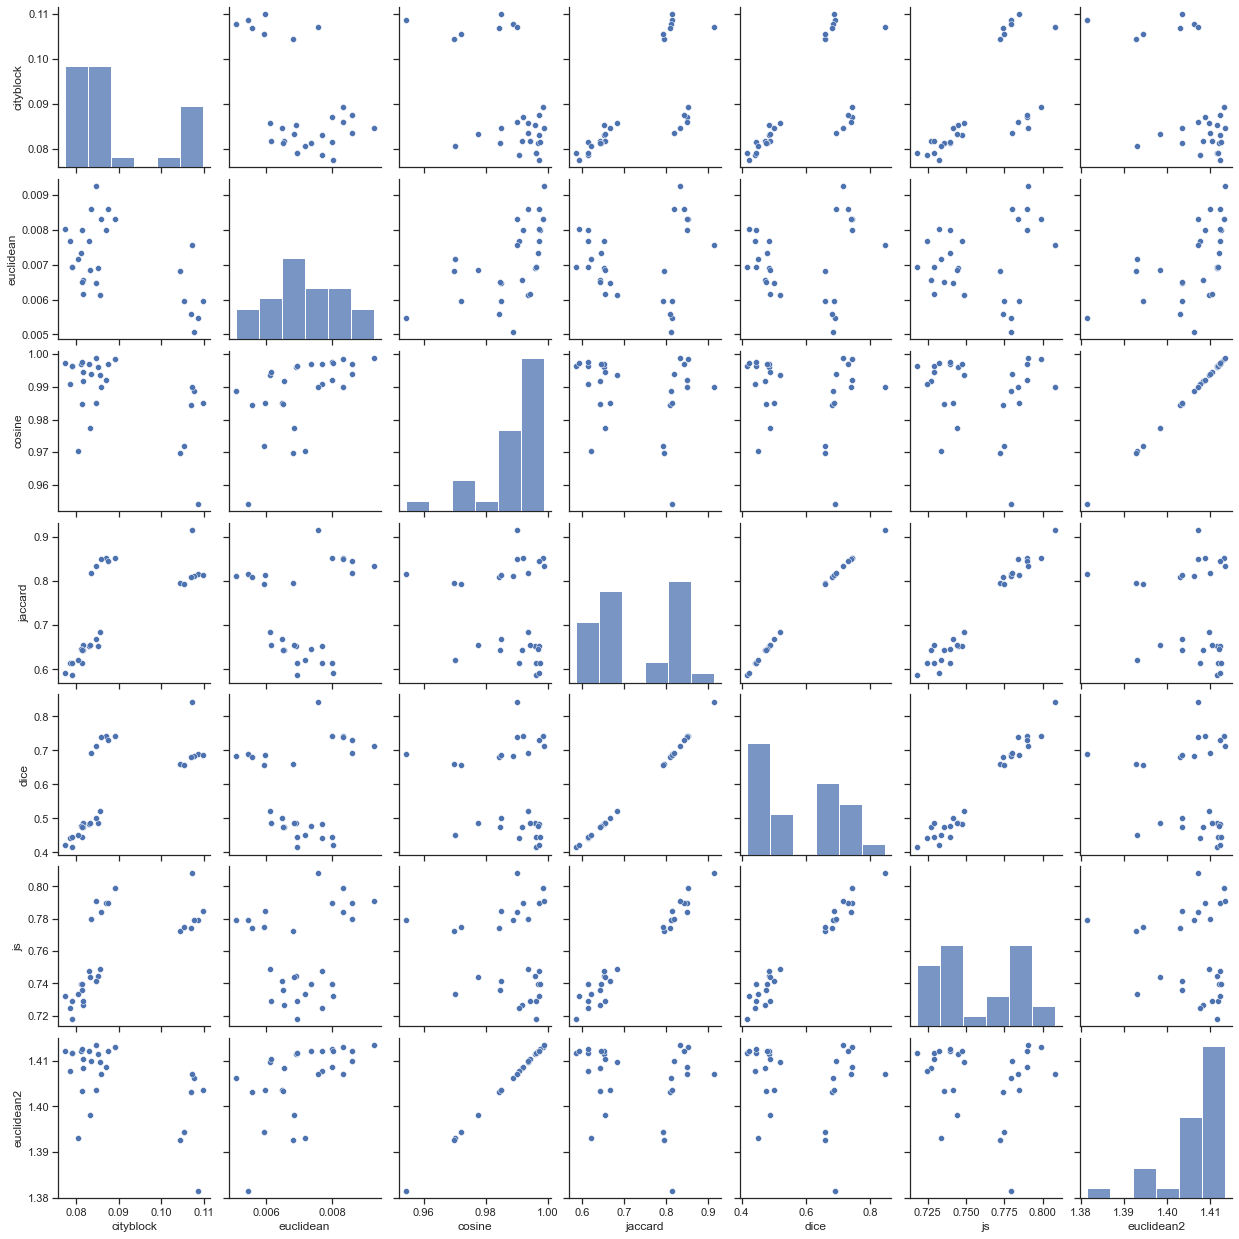

In [37]:
sns.pairplot(SAMPLE)

In [38]:
PAIRS.sort_values('cosine').head(20).style.background_gradient('YlGn')

#### Create Clusters

Hiearchical

In [39]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [40]:
def hca(sims, linkage_method='ward', color_thresh=.3, figsize=(10, 10)):
    tree = sch.linkage(sims, method=linkage_method)
    labels = DOC.title.values
    plt.figure()
    fig, axes = plt.subplots(figsize=figsize)
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

<Figure size 432x288 with 0 Axes>

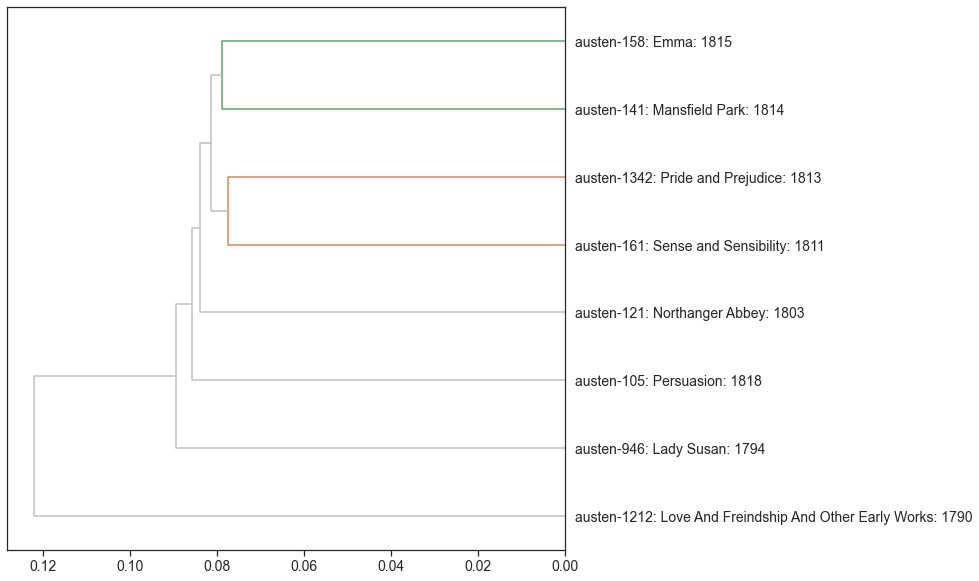

In [41]:
hca(PAIRS.cityblock, color_thresh=.08)

<Figure size 432x288 with 0 Axes>

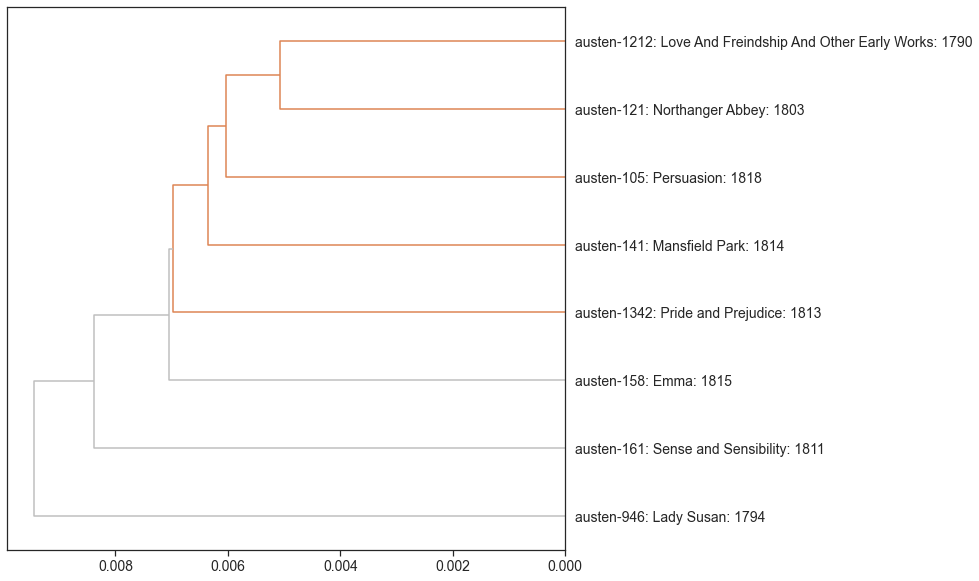

In [42]:
hca(PAIRS.euclidean, color_thresh=.007)

<Figure size 432x288 with 0 Axes>

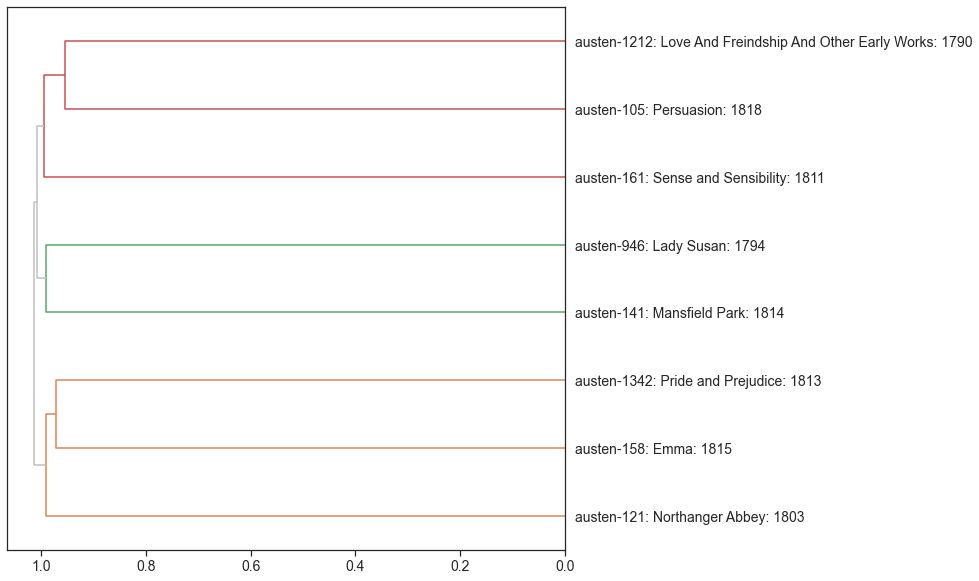

In [43]:
hca(PAIRS.cosine, color_thresh=1)

<Figure size 432x288 with 0 Axes>

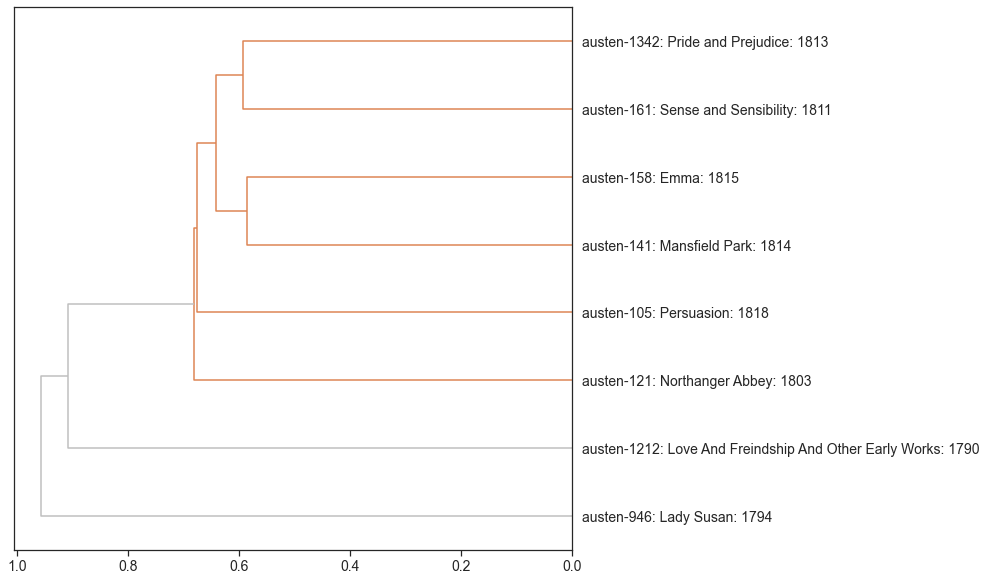

In [44]:
hca(PAIRS.jaccard, color_thresh=.8)

<Figure size 432x288 with 0 Axes>

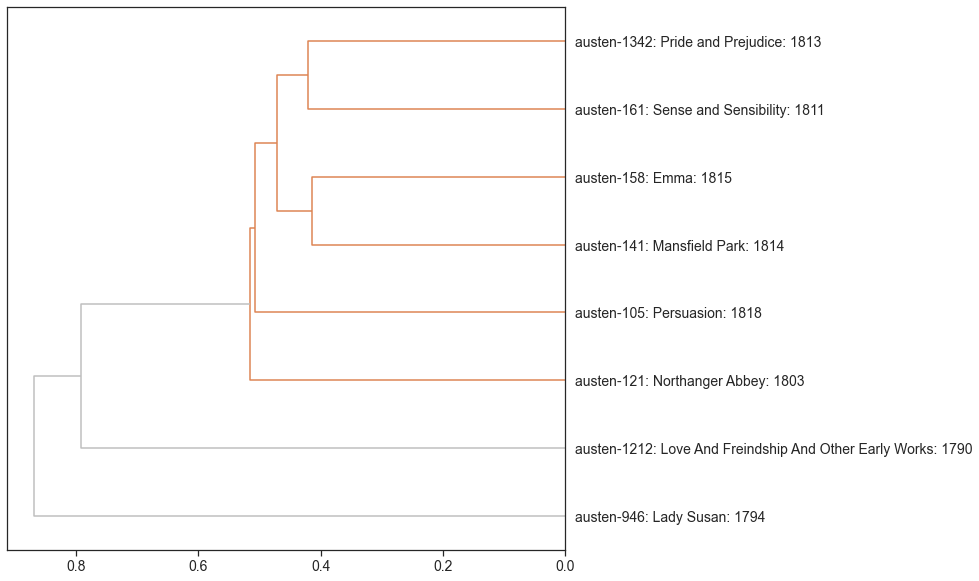

In [45]:
hca(PAIRS.dice, color_thresh=.6)

<Figure size 432x288 with 0 Axes>

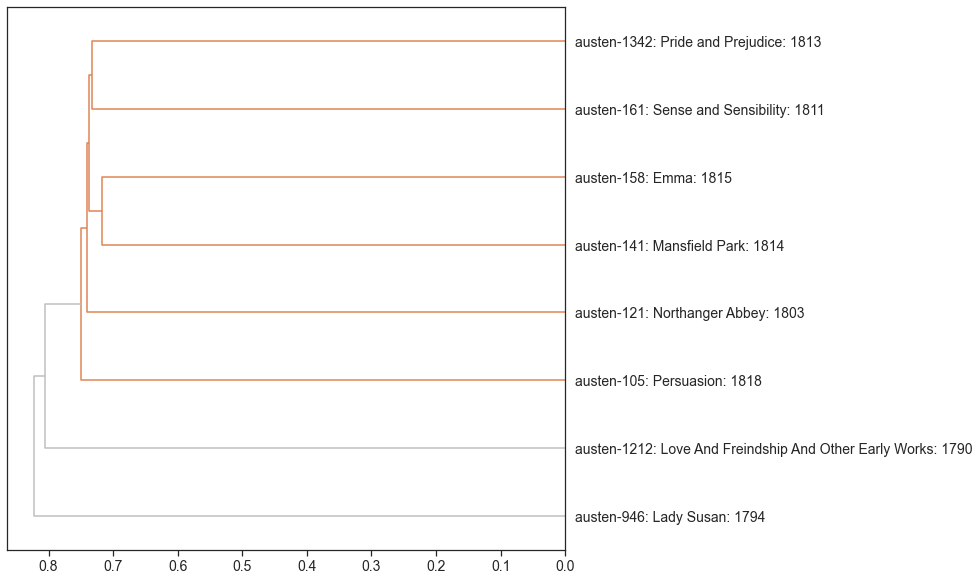

In [46]:
hca(PAIRS.js, color_thresh=.8)

Given the dendrograms, it seems that the js and dice seems to cluster well based on year. The majority of 1800+ are grouped togther while the later 1790,1794 are seperated out. The other metrics did not perform this well, which is why js and dice seems to be the best ones to consider for clustering. 